<a href="https://colab.research.google.com/github/MASOC24/ChatBot/blob/main/Crypto_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pandas numpy matplotlib seaborn yfinance scikit-learn streamlit prophet tensorflow keras


  Using cached streamlit-1.41.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
Using cached streamlit-1.41.1-py2.py3-none-any.whl (9.1 MB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl (79 kB)


In [2]:
import yfinance as yf
import pandas as pd

# List of top 30 cryptocurrencies
crypto_symbols = [
    "BTC-USD", "ETH-USD", "BNB-USD", "USDT-USD", "ADA-USD", "XRP-USD", "SOL-USD", "DOGE-USD",
    "DOT-USD", "AVAX-USD", "SHIB-USD", "LTC-USD", "MATIC-USD", "BUSD-USD", "UNI-USD", "LINK-USD",
    "ALGO-USD", "ATOM-USD", "VET-USD", "TRX-USD", "XMR-USD", "FTT-USD", "EGLD-USD", "ICP-USD",
    "HBAR-USD", "FIL-USD", "XTZ-USD", "THETA-USD", "AXS-USD", "SAND-USD"
]

# Fetch historical data for the last 1 year
def fetch_crypto_data(crypto_list):
    data = {}
    for symbol in crypto_list:
        data[symbol] = yf.download(symbol, period="1y", interval="1d")
    return data

crypto_data = fetch_crypto_data(crypto_symbols)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Example preprocess_clustering_data function
def preprocess_clustering_data(crypto_data):
    closing_prices = {}
    for symbol, data in crypto_data.items():
        if not data.empty:  # Check if data is not empty
            closing_prices[symbol] = data['Close']
        else:
            print(f"Warning: No data for {symbol}")

    # Convert to DataFrame and handle missing data
    closing_prices_df = pd.DataFrame(closing_prices)
    closing_prices_df.fillna(method="ffill", inplace=True)
    closing_prices_df.fillna(method="bfill", inplace=True)
    return closing_prices_df

# Simulate data for testing (replace with actual crypto_data)
# Replace with your logic to fetch data for 30 cryptocurrencies
crypto_data = {
    "BTC": pd.DataFrame({"Close": [50000, 51000, 52000, 53000]}),
    "ETH": pd.DataFrame({"Close": [4000, 4200, 4400, 4600]}),
    "LTC": pd.DataFrame({"Close": [200, 210, 220, 230]}),
    "DOGE": pd.DataFrame({"Close": [0.2, 0.21, 0.22, 0.23]}),
}

# Process the data
closing_prices = preprocess_clustering_data(crypto_data)

# Check if closing_prices is valid
if closing_prices.empty:
    raise ValueError("Closing prices DataFrame is empty. Check your crypto_data.")

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(closing_prices.T)  # Transpose for clustering

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Create a DataFrame for clustered cryptocurrencies
clustered_cryptos = pd.DataFrame({
    "Crypto": closing_prices.columns,
    "Cluster": clusters
})

print(clustered_cryptos)
print(closing_prices.head())

  Crypto  Cluster
0    BTC        1
1    ETH        0
2    LTC        2
3   DOGE        3
     BTC   ETH  LTC  DOGE
0  50000  4000  200  0.20
1  51000  4200  210  0.21
2  52000  4400  220  0.22
3  53000  4600  230  0.23


<ipython-input-5-038e94a72f8f>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_prices_df.fillna(method="ffill", inplace=True)
<ipython-input-5-038e94a72f8f>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_prices_df.fillna(method="bfill", inplace=True)


In [6]:
# Compute correlation matrix for the selected cluster
selected_cluster = clustered_cryptos[clustered_cryptos['Cluster'] == 0]['Crypto'].tolist()
correlation_matrix = closing_prices[selected_cluster].corr()

# Find top 4 positive and negative correlations
def top_correlations(corr_matrix, n=4):
    corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort")
    positive = corr_pairs[corr_pairs < 1].nlargest(n)
    negative = corr_pairs.nsmallest(n)
    return positive, negative

positive_corr, negative_corr = top_correlations(correlation_matrix)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series for a selected cryptocurrency
def plot_crypto_time_series(symbol):
    crypto_data[symbol]['Close'].plot(title=f"{symbol} Closing Price", figsize=(10, 6))
    plt.show()

# Plot distribution of closing prices
def plot_price_distribution(symbol):
    sns.histplot(crypto_data[symbol]['Close'], kde=True)
    plt.title(f"{symbol} Price Distribution")
    plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpscdm_0ay/h1rr12sv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpscdm_0ay/90dfn1hr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21733', 'data', 'file=/tmp/tmpscdm_0ay/h1rr12sv.json', 'init=/tmp/tmpscdm_0ay/90dfn1hr.json', 'output', 'file=/tmp/tmpscdm_0ay/prophet_modelpczdzehj/prophet_model-20241221002416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


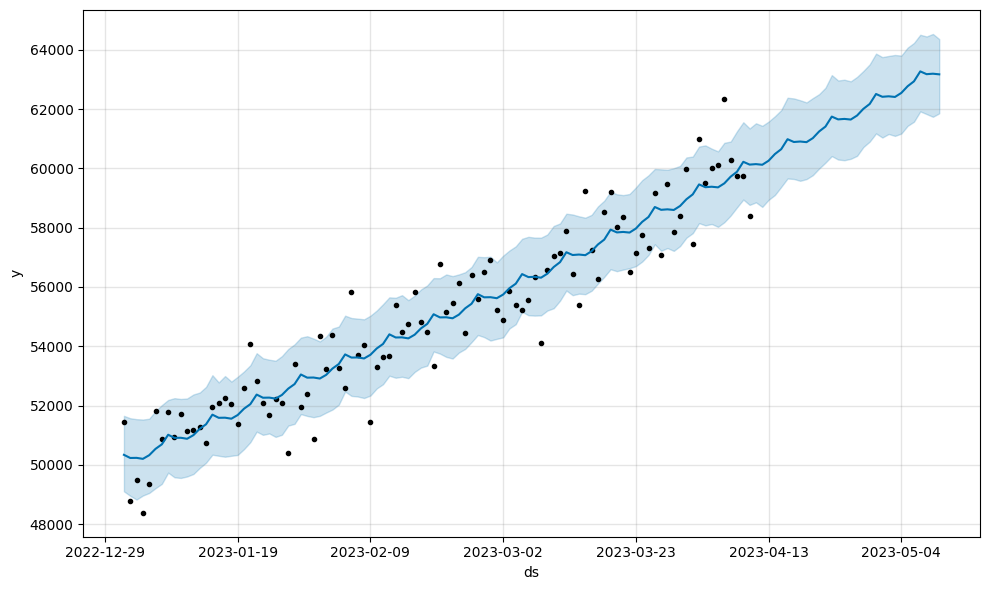

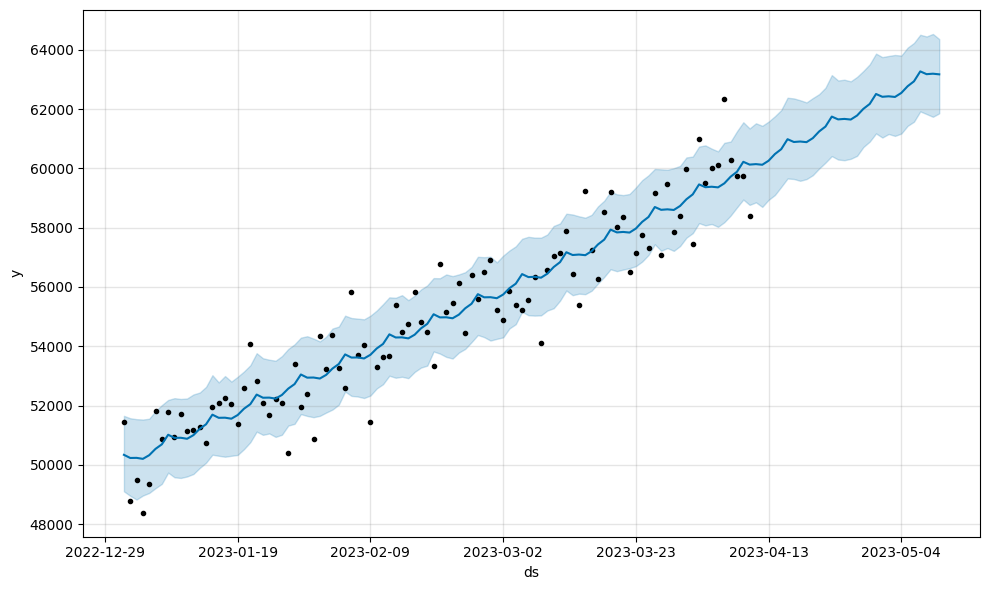

In [15]:
from prophet import Prophet
import pandas as pd
import numpy as np

# Example Data Preparation Function
def prepare_prophet_data(data):
    data = data.reset_index()  # Ensure index is numeric
    data = data.rename(columns={"Date": "ds", "Close": "y"})  # Rename for Prophet
    data["ds"] = pd.to_datetime(data["ds"])  # Ensure datetime format
    return data[["ds", "y"]]

# Mock cryptocurrency data (replace this with actual data)
crypto_data = pd.DataFrame({
    "Date": pd.date_range(start="2023-01-01", periods=100),
    "Close": np.linspace(50000, 60000, 100) + np.random.randn(100) * 1000
})

# Prepare data for Prophet
crypto_data = prepare_prophet_data(crypto_data)

# Train Prophet Model
def train_prophet(data):
    model = Prophet()
    model.fit(data)
    return model

# Forecasting
def forecast_prophet(model, periods=30):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Train and Forecast
btc_model = train_prophet(crypto_data)
btc_forecast = forecast_prophet(btc_model)

# Plot Forecast
btc_model.plot(btc_forecast)


In [24]:
def generate_trading_signals(prices, short_window=40, long_window=100):
    # Create a DataFrame to hold signals
    signals = pd.DataFrame(index=prices.index)
    signals['Price'] = prices
    signals['Short_MA'] = prices.rolling(window=short_window, min_periods=1).mean()
    signals['Long_MA'] = prices.rolling(window=long_window, min_periods=1).mean()
    signals['Signal'] = 0

    # Generate buy/sell signals based on moving averages
    signals['Signal'][short_window:] = np.where(
        signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1, -1
    )
    return signals

# Example: Adjust column reference based on actual structure
btc_data = crypto_data['y']  # Update with the actual column for BTC prices
btc_signals = generate_trading_signals(btc_data)



<ipython-input-24-7a6940559ddf>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(
<ipython-input-24-7a6940559ddf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [20]:
print(crypto_data.columns)

Index(['ds', 'y'], dtype='object')


In [25]:
import streamlit as st

st.title("Cryptocurrency Analysis Dashboard")

# Select cryptocurrency
crypto_choice = st.selectbox("Select Cryptocurrency", closing_prices.columns)

# Display EDA
if st.button("Show EDA"):
    st.line_chart(crypto_data[crypto_choice]['Close'])

# Display Correlation
if st.button("Show Correlation"):
    st.write("Top Positive Correlations:")
    st.write(positive_corr)
    st.write("Top Negative Correlations:")
    st.write(negative_corr)

# Forecasting
if st.button("Show Forecast"):
    model = train_prophet(crypto_choice)
    forecast = forecast_prophet(model)
    st.line_chart(forecast[['ds', 'yhat']].set_index('ds'))


2024-12-21 00:35:30.138 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.433 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-21 00:35:30.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-21 00:35:30.472 Session state does not 